# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Hyeon Su Gim (403364)
    
    2. Zhi Peng Tan
    
    3.

## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [1]:
import random
import pandas as pd
import numpy as np
import math

# Import into dataframe df
df = pd.read_csv("dataset.csv")

# Set seed with student ID of Hyeon Su Gim.
random.seed(403364)

# Generate sampled_data dataframe based on random sampling of df, based on sampling size k which is the rounded up (ceiling) of the length (shape[0]) of the original dataframe, df. 
sampled_data = df[df.index.isin(random.sample(range(len(df)),k=math.ceil(0.9*len(df))))]
sampled_data.name = 'sampled_data'

# Export sample_data to a csv of the same name in the same directory.
sampled_data.to_csv("sampled_data.csv", index=False)

## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [2]:
new_sampled_data = sampled_data[sampled_data.SurfaceR < 50000]
new_sampled_data.name = 'new_sampled_data' # Useful for labeling later.

   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

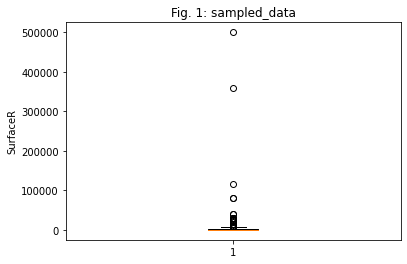

In [3]:
import matplotlib.pyplot as plt

# Plot starting with figure # 1.
plt.figure(1)
bx = plt.boxplot(sampled_data.SurfaceR)
plt.title("Fig. 1: " + sampled_data.name)
plt.ylabel('SurfaceR')
plt.xlabel('')

# Finds lower and whisker values from the boxplot. They are the first value of two floats listed, as the boxplot is oriented vertically.
lower_whisker = int(bx['whiskers'][0].get_ydata()[0])
upper_whisker = int(bx['whiskers'][1].get_ydata()[0])

# Subset cleaned_data from sampled_data using the inclusive boundaries lower and upper_whisker. See between() for pandas.
cleaned_data = sampled_data[sampled_data.SurfaceR.between(lower_whisker, upper_whisker, inclusive=True)]
cleaned_data.name = 'cleaned_data' # Useful for labeling later.

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

       new_sampled_data  cleaned_data
count        166.000000    107.000000
mean        3585.722892    869.158879
std         7503.975134    776.623220
min           30.000000    300.000000
25%          300.000000    300.000000
50%          600.000000    500.000000
75%         2500.000000   1100.000000
max        40000.000000   3000.000000


([<matplotlib.axis.XTick at 0x7fae5f381c50>,
 [Text(1, 0, 'new_sampled_data'), Text(2, 0, 'cleaned_data')])

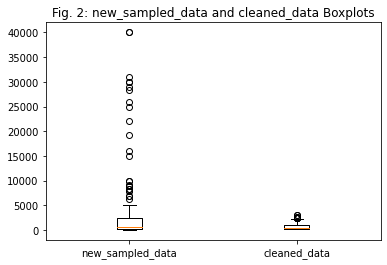

In [4]:
twosets = [new_sampled_data, cleaned_data]
stats = pd.DataFrame()
for i in twosets:
    stats[i.name] = i.SurfaceR.describe()
print(stats)

twosets_SurfaceR = [new_sampled_data.SurfaceR, cleaned_data.SurfaceR]
plt.figure(2)
plt.title("Fig. 2: new_sampled_data and cleaned_data Boxplots")
plt.boxplot(twosets_SurfaceR)
plt.xticks([1,2], ("new_sampled_data", "cleaned_data"))


Explanation: 
The "new_sampled_data" dataset is larger in number than that of "cleaned_data" as there is a hard cut-off for the maximum value of SurfaceR = 50000. To be specific, "cleaned_data" essentially labeled any value above 50000 as being outliers and "new_sampled_data" was chosen on a more statistics-based measured, by selecting values smaller than the lower whisker or that larger than the upper whisker, which themselves are calculated as 1.5 * IQR (Interquartile Range = Q3 - Q1) below Q1 or above Q3. Visually, the more involved method of excluding outliers in "cleaned_data" shows many large values ranging from approximately 5000 to 40000 were excluded (Fig. 2). The presence of so many large values in "new_sampled_data" have many repercussions, including a larger mean, median (50%), Q3 (75%), and maximum than those in "cleaned_data". The standard deviation is also larger because the data is much more spread out than that for "cleaned_data". This larger spread is represented in the smaller minimum of 30 for "new_sampled_data" than 300 for "cleaned_data". In summary, setting a hard limit at 50000 for outliers in this particular "sampled_data" resulted in a subset that had a larger spread, and thus larger median, mean, maximum and Q3 values than a subset chosen with IQR taken into consideration in choosing outliers. 

### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

Mean: 869.1588785046729
Median: 500.0


<Figure size 432x288 with 0 Axes>

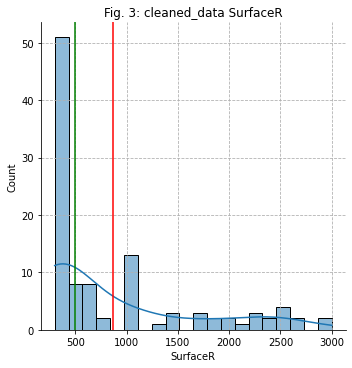

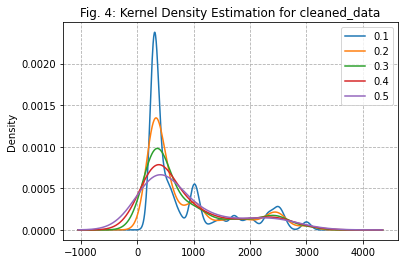

In [5]:
import seaborn as sns

plt.figure()
sns.displot(data=cleaned_data, x='SurfaceR', kde=True, bins=20)
plt.title("Fig. 3: cleaned_data SurfaceR")
plt.grid(ls="--")
plt.axvline(x=cleaned_data.SurfaceR.mean(), color='r', label='mean')
plt.axvline(x=cleaned_data.SurfaceR.median(), color='g', label='median')
print('Mean: ' + str(cleaned_data.SurfaceR.mean()))
print('Median: ' + str(cleaned_data.SurfaceR.median()))

plt.figure()
plt.title("Fig. 4: Kernel Density Estimation for cleaned_data")
bw = [0.1,0.2,0.3,0.4,0.5]
for i in bw:
    cleaned_data.SurfaceR.plot.kde(bw_method=i, label=str(i))
plt.grid(ls="--")
plt.legend()

Explanation: Even with the outliers excluded, "cleaned_data" shows a very strong skew to the right. A large number of entries are concentrated in the lower SurfaceR numbers (Fig. 3). This is indicated further by the median which is cosiderably smaller than the mean. In Fig. 4, we can also see that for kernel density estimation for probabilistic estimations of SurfaceR in "cleaned_data", it can be said the subset also has a smaller second peak around 2000-3000, considering the different bandwidths used. A lower bandwidth (i.e. 0.1) allows for more precise estimation of SurfaceR frequency in the dataset, but may not be useful for recognizing trends. For bandwidths of 0.2-0.5, they all follow similar trends of a large peak around 300, then a smallr peak at around 2400. When compared with the histogram in Fig. 3, this may be correct because there is a considerable spread of SurfaceR from 1500 to 3000. However, a large concentration of values from 1000-1050 (bin size is 50) indicates that the second peak may be at around 1000 instead of 2400. In conclusion, it is certain that "cleaned_data" is heavily skewed to the right.

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

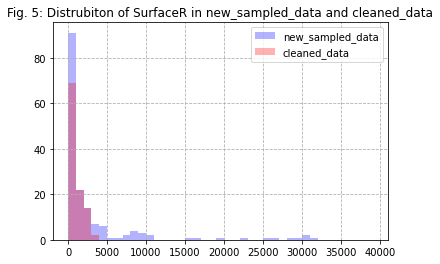

In [6]:
plt.figure(3)
plt.title('Fig. 5: Distrubiton of SurfaceR in new_sampled_data and cleaned_data')
plt.hist(new_sampled_data.SurfaceR, label=new_sampled_data.name, bins=np.arange(0,40000,1000), lw=3,fc=(0, 0, 1, 0.3))
plt.hist(cleaned_data.SurfaceR, label=cleaned_data.name, bins=np.arange(0,40000,1000), ls="dotted",fc=(1,0,0, 0.3))
plt.grid(ls='--')
plt.legend()

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

Text(0.5, 0.98, 'Fig. 11: Boxplots at every AcessR value')

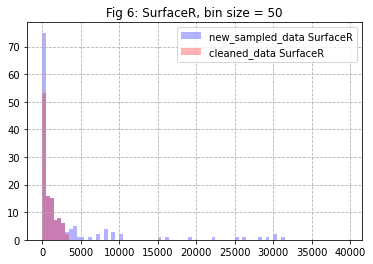

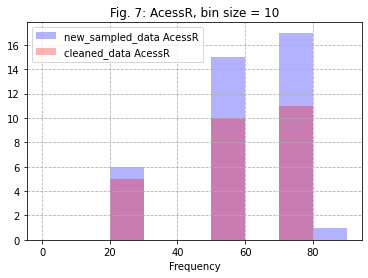

<Figure size 432x288 with 0 Axes>

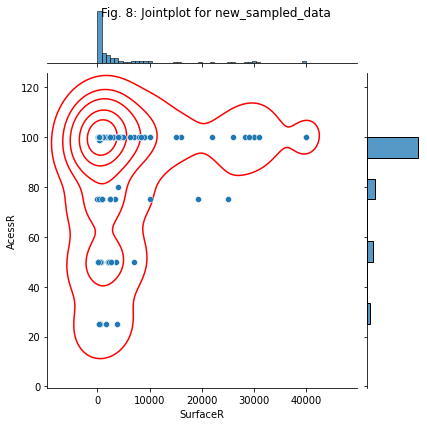

<Figure size 432x288 with 0 Axes>

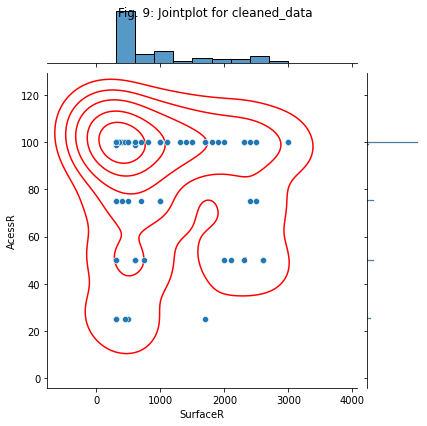

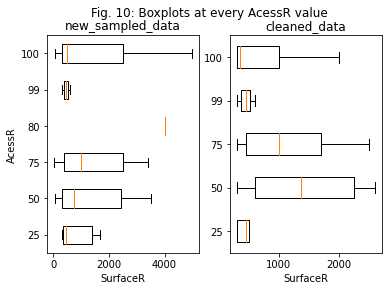

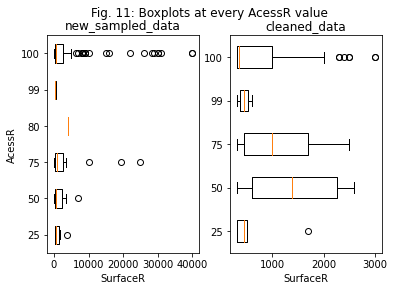

In [7]:
plt.figure()
plt.title("Fig 6: SurfaceR, bin size = 50")
plt.hist(new_sampled_data.SurfaceR, label="new_sampled_data SurfaceR", bins=np.arange(0,40000,500), lw=3,fc=(0, 0, 1, 0.3))
plt.hist(cleaned_data.SurfaceR, label="cleaned_data SurfaceR", bins=np.arange(0,40000,500), ls="dotted",fc=(1,0,0, 0.3))
plt.grid(ls='--')
plt.legend()

plt.figure()
plt.title("Fig. 7: AcessR, bin size = 10")
plt.hist(new_sampled_data.AcessR, bins=np.arange(0,100,10), label="new_sampled_data AcessR", lw=3,fc=(0, 0, 1, 0.3))
plt.hist(cleaned_data.AcessR, bins=np.arange(0,100,10), label="cleaned_data AcessR", fc=(1,0,0, 0.3))
plt.xlabel('Frequency')
plt.grid(ls='--')
plt.legend()

plt.figure()
jointplot = sns.jointplot(data=new_sampled_data, x="SurfaceR", y="AcessR")
jointplot.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plt.suptitle("Fig. 8: Jointplot for new_sampled_data")
plt.figure()
jointplot2 = sns.jointplot(data=cleaned_data, x="SurfaceR", y="AcessR")
jointplot2.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plt.suptitle("Fig. 9: Jointplot for cleaned_data")

fig, axes = plt.subplots(nrows=1,ncols=2)
i = 0
for data in [new_sampled_data, cleaned_data]:
    temp = []
    for acess in sorted(data.AcessR.unique()):
        temp.append(data[data.AcessR==acess].SurfaceR)
    axes[i].boxplot(temp, vert=False, showfliers=False)
    axes[i].set_yticklabels(sorted(data.AcessR.unique()))
    axes[i].set_title(data.name)
    axes[i].set_xlabel("SurfaceR")
    i += 1
axes[0].set_ylabel("AcessR")
plt.suptitle("Fig. 10: Boxplots at every AcessR value") 

fig, axes = plt.subplots(nrows=1,ncols=2)
i = 0
for data in [new_sampled_data, cleaned_data]:
    temp = []
    for acess in sorted(data.AcessR.unique()):
        temp.append(data[data.AcessR==acess].SurfaceR)
    axes[i].boxplot(temp, vert=False, showfliers=True)
    axes[i].set_yticklabels(sorted(data.AcessR.unique()))
    axes[i].set_title(data.name)
    axes[i].set_xlabel("SurfaceR")
    i += 1
axes[0].set_ylabel("AcessR")
plt.suptitle("Fig. 11: Boxplots at every AcessR value") 


Explanation: For both datasets, the highest frequency happens when SurfaceR = 0-500, AcessR = 70-80. The bin size was changed to 50 instead of 100 in Fig. 5 to enable a finer representation. Fig. 6-7 show that cleaned_data is a subset of new_sampled_data. Fig. 8-9 are more revealing of what kind of a subset cleaned_data is. Due to its particular way of excluding outliers, "cleaned_data" has a larger area where the density of points corresponding between AcessR and SurfaceR . To illustrate the point, examine the kernel density plot in Fig. 8 which displays layers of density with AcessR = 100 and SurfaceR =~ 300 being the center. With the dictated field of levels = 6, we can see the second level beginning when SurfaceR = 10000 for AcessR = 100. The second level then encompasses the lower values of AcessR and the ascending levels of density concentrate around the aforementioned "epicenter" of AcessR = 100, SurfaceR = ~300. However, in Fig. 9, the second level starts at around SurfaceR = 2500 for AcessR = 100. The first level also extends to lower values of AcessR for higher values of SurfaceR (notice the second "dip" on the right side of the figure, which is non-existent in Fig. 8). This implies that in cleaned_data, the value of AcessR is less directly correlated to the variance in values of SurfaceR. In new_sampled_data, if values of AcessR are larger, we see a greater variance in the values of SurfaceR (hence, the upper bracket kernel density plot). In cleaned_data, we are likely to see a similar variance in SurfaceR if AcessR is, let's say, 50 or 75. This is clearly visible in Fig. 10, where with the condition of the whiskers being the minimum and maximum value at each AcessR (showfliers = False in matplotlib.boxplot), cleaned_data shows a wide box at AcessR = 50 and 75 when compared to 100. In contrast, in new_sampled_data, the boxes are similar in range for AcessR = 100, 75 and 50. If the whiskers and box are calculated with outliers being classifed as 1.5 * IQR beyond the median, we can continue to see the same trend with new_sampled_data having similar boxes in range and cleaned_data varying at different values of AcessR (Fig. 11). Interestingly, if AcessR = 99 or 25, SurfaceR for both datasets are small in value. 

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [8]:
if 'number_frogs' in new_sampled_data:
    del new_sampled_data['number_frogs']
new_sampled_data['number_frogs'] = new_sampled_data.iloc[:, 15:22].sum(axis=1) # new_sampled_data['number_frogs'] = temp # Despite the warning of a value trying to be set on a copy of a slice from a dataframe, it is okay since the new_sampled_data itself it being changed. The columns with indices 15-21 are being changed.
new_sampled_data.head() # check values.

/Users/johngim/anaconda3/envs/env-IDS2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,SurfaceR,NumberR,TypeR,VegetationR,Surroundings1,Surroundings2,Surroundings3,UseR,FishingR,...,PollutionR,ShoreR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,number_frogs
0,1,600,1,a,4,e,b,h,0,0,...,0,natural,0,0,0,0,0,0,0,0
1,2,700,1,d,1,h,e,h,3,1,...,0,natural,0,1,1,0,0,1,0,3
2,3,200,1,d,1,h,e,h,3,4,...,0,natural,0,1,1,0,0,1,0,3
3,4,300,1,d,0,e,h,b,3,4,...,0,natural,0,0,1,0,0,0,0,1
4,5,600,2,a,4,h,b,e,0,0,...,0,natural,0,1,1,1,0,1,1,5


   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

<class 'pandas.core.indexes.base.Index'>
tree 1 system entropy:  2.782218925517882
tree 2 system entropy:  2.782218925517882


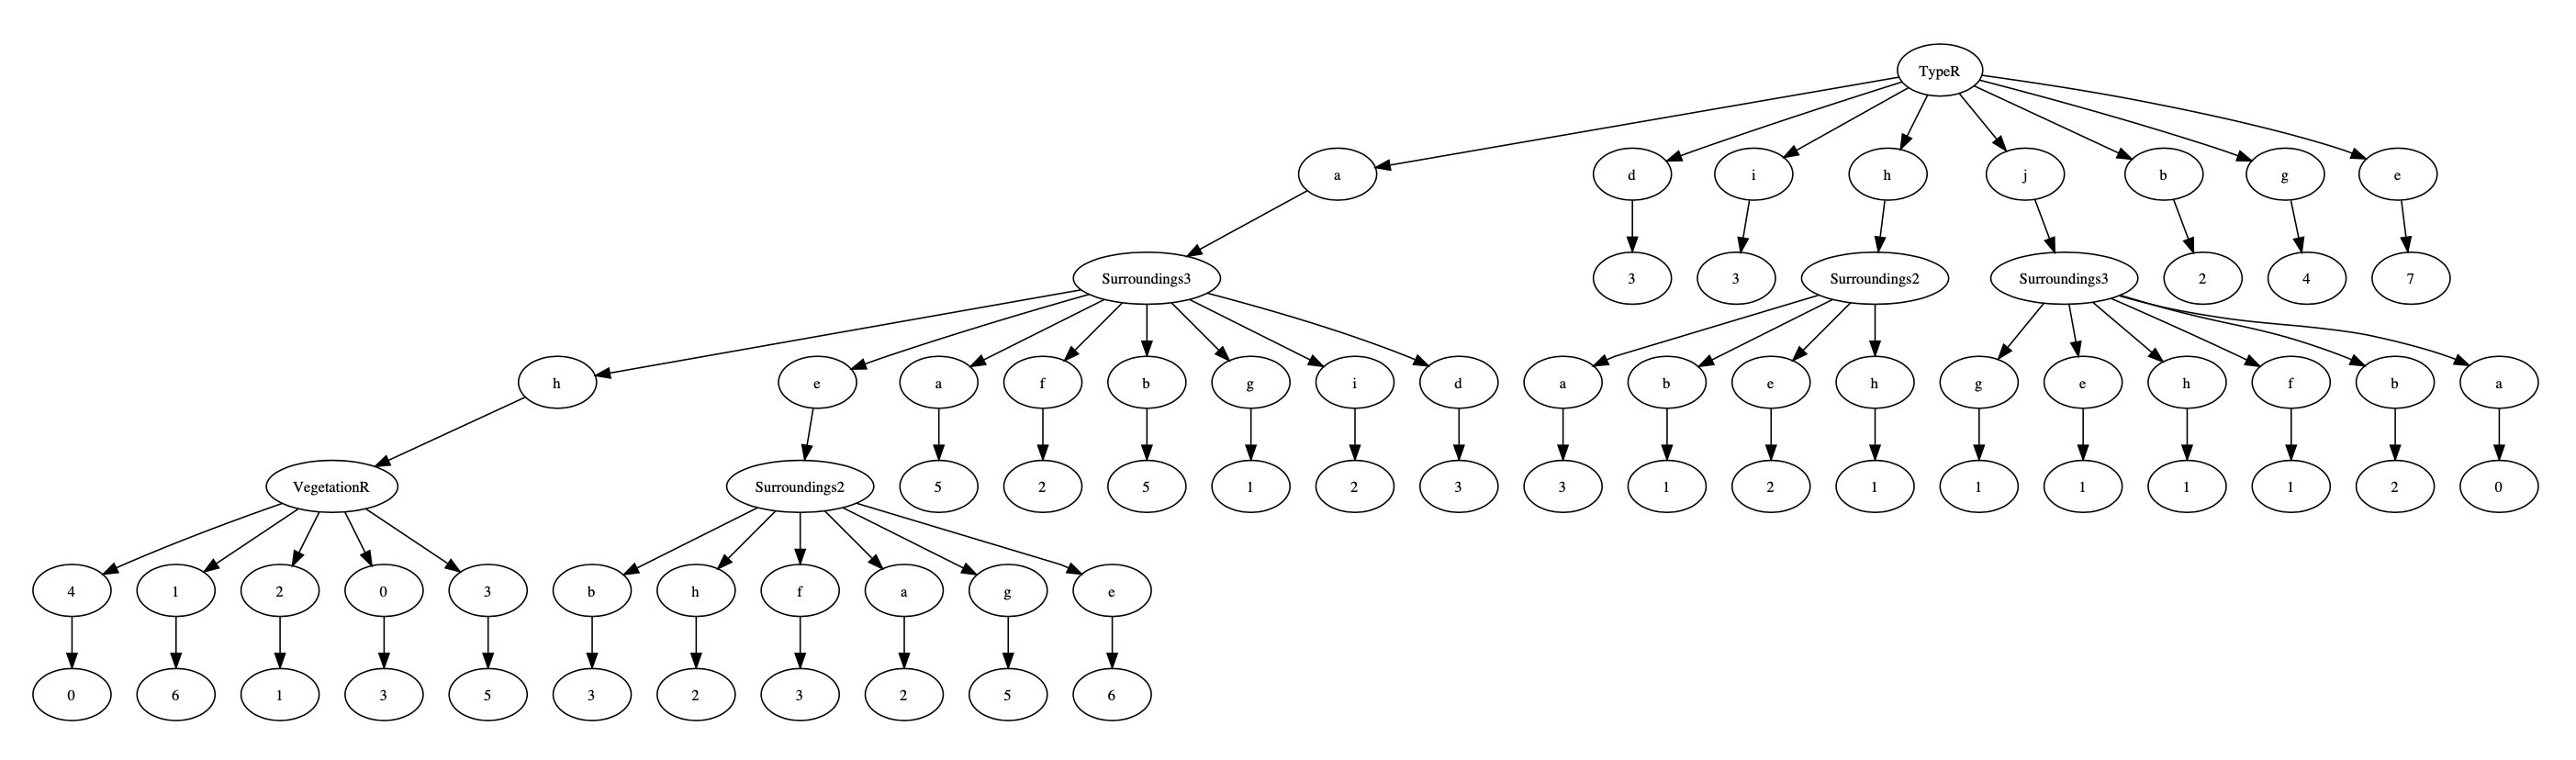

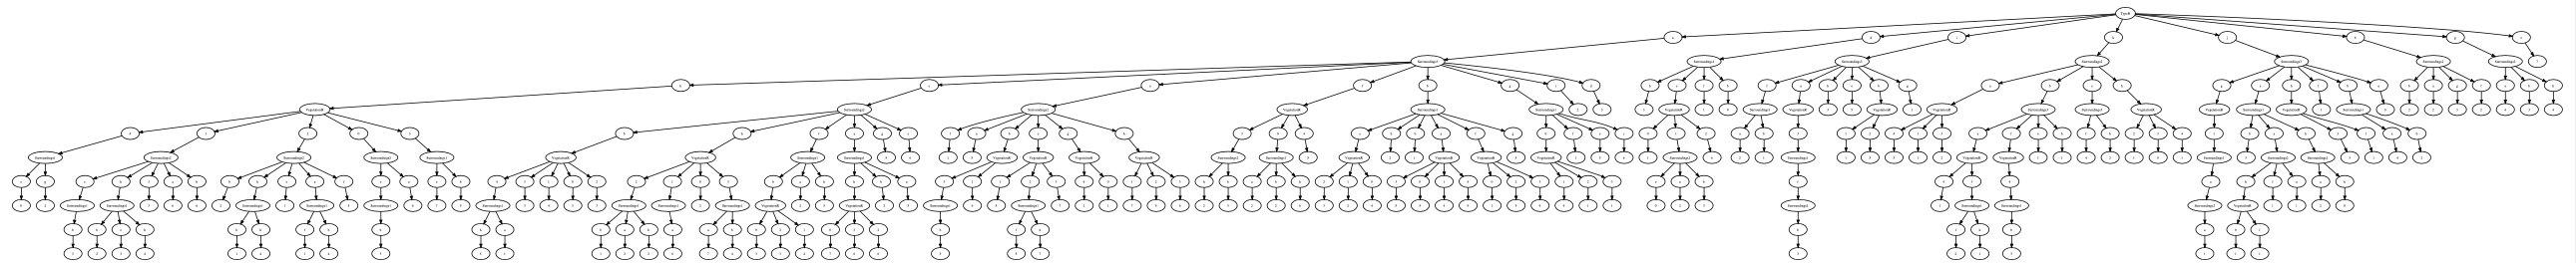

In [15]:
from p_decision_tree.DecisionTree import DecisionTree
import graphviz
from graphviz import Graph
from IPython.display import Image

treedata = new_sampled_data.copy() # make copy of new_sampled_data just in case of disaster.
columns = treedata.columns
print(type(columns))# Get 
descriptive_features = columns[3:8]
target = columns[-1]
for column in columns:
    treedata[column] = treedata[column].astype(str)
data_features = treedata[descriptive_features].values
data_target = treedata[target].values

g = Graph(format="png")
tree1 = DecisionTree(data_features.tolist(), descriptive_features.tolist(), data_target.tolist(), "entropy")
tree1.id3(0,15)
# dot1 = tree1.print_visualTree(render=True)

tree2 = DecisionTree(data_features.tolist(), descriptive_features.tolist(), data_target.tolist(), "entropy")
tree2.id3(0,1)
# dot2 = tree2.print_visualTree(render=True)

print("tree 1 system entropy: ", format(tree1.entropy))
print("tree 2 system entropy: ", format(tree1.entropy))

display(Image(filename='figures/tree1.png'))
display(Image(filename='figures/tree2.png'))

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

Explanation: The pdf of the visual representation of the decision tree for tree1 is available in the folder "output". Using the categorical descriptive features "TypeR", "VegetationR" (numbers 0-4 are treated as low-high categorial descriptors),"Surroundings1", "Surroundings2", and "Surroundings3", ID3 was applied to split the tree. In each round, the split is made based on the best possible information gain. In the first round, "TypeR" was the attribute chosen. In the second round, the best attribute for splitting the tree are the "Surroundings" attribute, which have subcategories 1, 2, and 3, themselves sharing all the same categories. Specifically, "Surroundings2" and "Surroundings3" were used.

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

Explanation: The difference between tree1 and tree2 can be seen in their visual representations. Screenshots of the two decision trees are available in section (b). You are welcome to check the visual representations by uncommenting the respective prin_visualTree(render=True) commands for tree1 and tree2 then viewing "figures/visualTree.gv.pdf". From the trees, it is very easy to see tree2 is much more complex. This is due to the minimal number of samples for pruning tree2 being much lower (1) than that for tree1 (15). This creates an overfitted tree where a split is created for every case. The information gain is thus much better at every round, but the resulting tree is not very useful to the user. Hence, it is an exercise to configure minimal number of samples to balance the information gain with the possibility of overfitting the data. 

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [16]:
restricted_data = sampled_data.drop(["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"], axis=1)

   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [17]:
restricted_data.head()

,SurfaceR,TypeR,VegetationR,UseR,FishingR,AcessR,RoadDistanceR,BuildingR,PollutionR,ShoreR,Green frogs,Brown frogs
0,600,a,4,0,0,50,0,0,0,natural,0,0
1,700,d,1,3,1,75,1,1,0,natural,0,1
2,200,d,1,3,4,75,1,1,0,natural,0,1
3,300,d,0,3,4,25,0,0,0,natural,0,0
4,600,a,4,0,0,99,0,5,0,natural,0,1


Explanation: The features useful for logistic regression are those with numeric values. The only features in the original restricted dataset that are not numerical are TypeR and ShoreR. Hence those will required modification before logistic regression. Logistic regression relies on numerical data.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

Explanation: From sklearn.prepocessing, the LabelEncoder is suited best for the categorical variables TypeR and ShoreR. They allow categories that are not binary to be transformed into numbers. Since TypeR's categories range from A-J, it has been converted to 0-9. ShoreR's categories are indeed binary, but that is also handled by LabelEncoder as well.

In [18]:
from sklearn.preprocessing import LabelEncoder

mod_restr_data = restricted_data.copy()
columns = mod_restr_data.columns
descriptive_features = columns[:10]
target_features = columns[-2:]
labelencoder = LabelEncoder()
mod_restr_data['TypeR'] = labelencoder.fit_transform(mod_restr_data['TypeR'])
mod_restr_data['ShoreR'] = labelencoder.fit_transform(mod_restr_data['ShoreR'])
print(mod_restr_data[:2])

   SurfaceR  TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
0       600      0            4     0         0      50              0   
1       700      2            1     3         1      75              1   

   BuildingR  PollutionR  ShoreR  Green frogs  Brown frogs  
0          0           0       1            0            0  
1          1           0       1            0            1  


(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

,Green frogs,Brown frogs
SurfaceR,0.162114,0.061564
TypeR,-0.408197,0.018246
VegetationR,-0.068007,0.086450
UseR,0.286349,-0.040391
FishingR,0.284712,-0.027717
AcessR,0.028818,0.162143
RoadDistanceR,0.111052,0.081224
BuildingR,0.015569,0.113693
PollutionR,0.068179,-0.097140
ShoreR,0.066477,0.149514


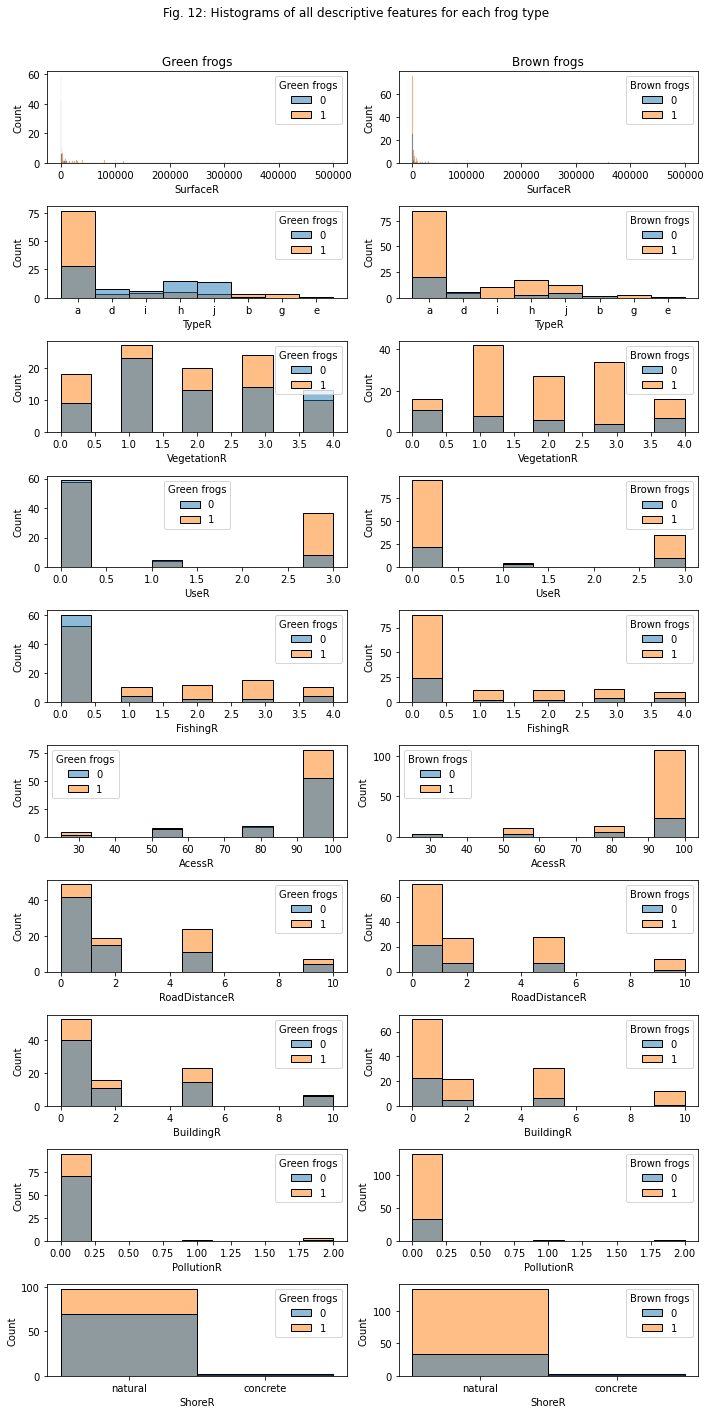

In [19]:

fig, axes = plt.subplots(10,2,figsize=(10,20))
descriptive_features = restricted_data.columns[:10] # isolate columns from original data set from before Q3b.
target_features = restricted_data.columns[-2:] # isolate target features (frog type)
for i in range(len(descriptive_features)):
    for frog in range(len(target_features)):
        sns.histplot(x=descriptive_features[i], data=restricted_data, hue = target_features[frog], ax=axes[i,frog])
axes[0,0].set_title(str(target_features[0]))
axes[0,1].set_title(str(target_features[1]))
plt.suptitle("Fig. 12: Histograms of all descriptive features for each frog type")
plt.tight_layout(rect=[0, 0, 1, 0.97])

correlations = pd.DataFrame(columns=mod_restr_data.columns[-2:], index=mod_restr_data.columns[:10]) # build dataframe to display correlation data for modified data set.
for frog in target_features:
    temp = []
    for col in descriptive_features:
        temp.append(mod_restr_data[frog].corr(mod_restr_data[col]))
    correlations[frog] = temp
correlations

Explanation: 

In Fig. 12, the histogram distribution for all descriptive features for each frog type is shown with the blue representing absence (numerically, 0), and orange representing presence (1) of the frog. We see that for TypeR, a categorial variable, the pattern is very clear; both frogs were counted as either absent or present in category "a" and not so much in others. However, TypeR may still be useful in predicting the presence or absence of frogs because there is a considerable variety of TypeR with non-trivial count of presence/absence reported in each category. This is in contrast to ShoreR, where we see a high frequency of both absence and presence of frogs in natural, but not in concrete shore types. This is fairly obvious, since frogs are not likely to be found in any concrete environment. Hence, ShoreR would be a poor choice as a descriptive feature. The same reasoning can be applied to PollutionR. With 0-2 indicating low-high pollution, we see a high count for low-pollution areas (PollutionR = 0) but virtually no information for other areas. Again, the logic may be that mostly natural sites were observed and hence concrete environments offer no valuable information to the presence of frogs. However, for other features such as RoadDistanceR, there is a spectrum of values (km to nearest road). The data shows that there is a considerable amount of information (different counts) for each distance to the road (0,1,2,5,9). For these features, some more measures may be considered such as correlation between the feature to each frog type.

The correlation between each frog and all other descriptive features can be viewed in the dataframe "correlations". These correlations were only done with TypeR and ShoreR being converted to numerical values. But what is important in the correlations is the absolute value. If the counts for each feature increases or decreases as the feature number increases (i.e. TypeR = 0-8), there could be a high absolute correlation score. However, we must be careful in interpreting too much from the correlation numbers since correlation only considers numeric values. In the case of TypeR, it may be heavily influenced by the high frequency of frogs either absent or present in category a (Fig. 12). On the other hand, for linearly scaled features such as VegetationR (0-4 = low to high density of vegetation), correlation may be more accurate in telling us whether or not presence of frogs depend on the density of vegetation in its environment. For green frogs, TypeR, UseR, FishingR, and SurfaceR have the highest absolute correlations. However, SurfaceR is heavily influenced by its category a. In this case, RoadDistanceR may be a better choice. For brown frogs, AcessR, BuildingR, ShoreR and PollutionR have the highest absolute correlations. Looking at the visualizations, they are confirmed to possibly serving well as descriptors.

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

# different descriptive features chosen from visual foray in part (c)
descriptive_features = [mod_restr_data[["TypeR", "UseR", "FishingR", "RoadDistanceR"]], mod_restr_data[["AcessR", "BuildingR", "ShoreR", "PollutionR"]]]

# for both green and brown frogs, train a logistic regression classifier with a liblinear solver and predict.
# This part also calculates and prints the accuracy and confusion matrix as it is simpler to do this in one for loop.
for frog in range(2):
    target_feature = mod_restr_data[target_features[frog]]
    classifier = LogisticRegression(solver = 'liblinear')
    classifier.fit(descriptive_features[frog], target_feature)
    target_pred = classifier.predict(descriptive_features[frog])
    print("------"+str(target_features[frog])+"------")
    print('Coefficients: ', classifier.coef_, '\n')
    print('Accuracy : ', metrics.accuracy_score(mod_restr_data[target_features[frog]], target_pred))
    print('Precision: ', metrics.precision_score(mod_restr_data[target_features[frog]], target_pred, average='binary'))
    print("Recall   : ", metrics.recall_score(mod_restr_data[target_features[frog]], target_pred, average='binary'))
    print('F1       : ', metrics.f1_score(mod_restr_data[target_features[frog]], target_pred, average="binary"))
    print("Confusion Matrix:\n", confusion_matrix(mod_restr_data[target_features[frog]], target_pred, labels=[0,1]),"\n")

print("Confusion Matrix Key:")
print("TN | FP")
print("---|---")
print("FN | TP")

------Green frogs------
Coefficients:  [[-0.33588348  0.26423152  0.109973    0.22343695]] 

Accuracy :  0.7251461988304093
Precision:  0.7166666666666667
Recall   :  0.8686868686868687
F1       :  0.7853881278538815
Confusion Matrix:
 [[38 34]
 [13 86]] 

------Brown frogs------
Coefficients:  [[ 0.01214496  0.07383471  0.42054476 -0.50224775]] 

Accuracy :  0.783625730994152
Precision:  0.788235294117647
Recall   :  0.9925925925925926
F1       :  0.8786885245901639
Confusion Matrix:
 [[  0  36]
 [  1 134]] 

Confusion Matrix Key:
TN | FP
---|---
FN | TP


   (e) For each of the two trained classifiers compute and print the confusion matrix.

The confusion matrix has been implemented in part (d) due to the ease of for-loops for each frog type.

(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

Explanation: The coefficients are the numbers in a logistic regression model based on a linear solver which results in the least amount of error when checked with every data point in the dataset. Since the descriptive features were different for the two frogs, the coefficients correspond to different features. The accuracies of both models are above 0.7, but the brown frog model is more accurate at 0.78. A closer look at the confusion matrix may give part of an answer to why. Brown frogs have a large amount of true positives and no true negatives. It only falsely categorized the absence of brown frogs once, and falsely categorized the presence of brown frogs 36 times. In other words, the model is more precise (see precision). It intuitively is better than the classifer for green frogs at not labeling as positive a sample that is negative (from the descriptive features, the classifier is less likely to predict sites to have brown frogs whereas in real life they don't brown frogs). The classifier for green frogs is much worse (precision = 0.7286 vs. 0.7882). When looking back at Fig. 12, we can see that for many of the descriptors, there were lower frequencies for brown frog absence than for green frog absence. It may be simply that because less brown frog absences were repoted, the brown frog classifier has a lower probability of labeling a positive that is actually negative.

In the same logic, the recall for the brown frog classifier is very high (0.99259) and the green classifier, lower (0.8687). This means the brown frog classifier is superior in finding all positive samples. When weighing the recall and precision together (F1), we see that the brown frog classifier is better (0.8787 vs. 0.7854). 

Based on these metrics, the brown frog classifier is actually quite good in predicting the presence of brown frogs based on the chosen descriptors AcessR, BuildingR, ShoreR and PollutionR. For green frogs, the classifier based on the chosen descriptors (TypeR, UseR, FishingR, and SurfaceR) is worse at predicting. Although both classifiers labeled a sizable count as false positives (34,36), the brown frog classifier can be recommended due to its very good prediction of all positive samples. 

The applied methods could be improved to get better results by ....

## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

     SurfaceR TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
0         600     a            4     0         0      50              0   
1         700     d            1     3         1      75              1   
2         200     d            1     3         4      75              1   
3         300     d            0     3         4      25              0   
4         600     a            4     0         0      99              0   
..        ...   ...          ...   ...       ...     ...            ...   
183      4000     h            4     0         0     100              1   
185       300     i            2     0         0     100              5   
186       500     a            4     0         0     100              5   
187       300     h            3     0         0     100              1   
188       300     h            3     0         0     100              1   

     BuildingR  PollutionR   ShoreR  Green frogs  Brown frogs  
0            0           0  natural

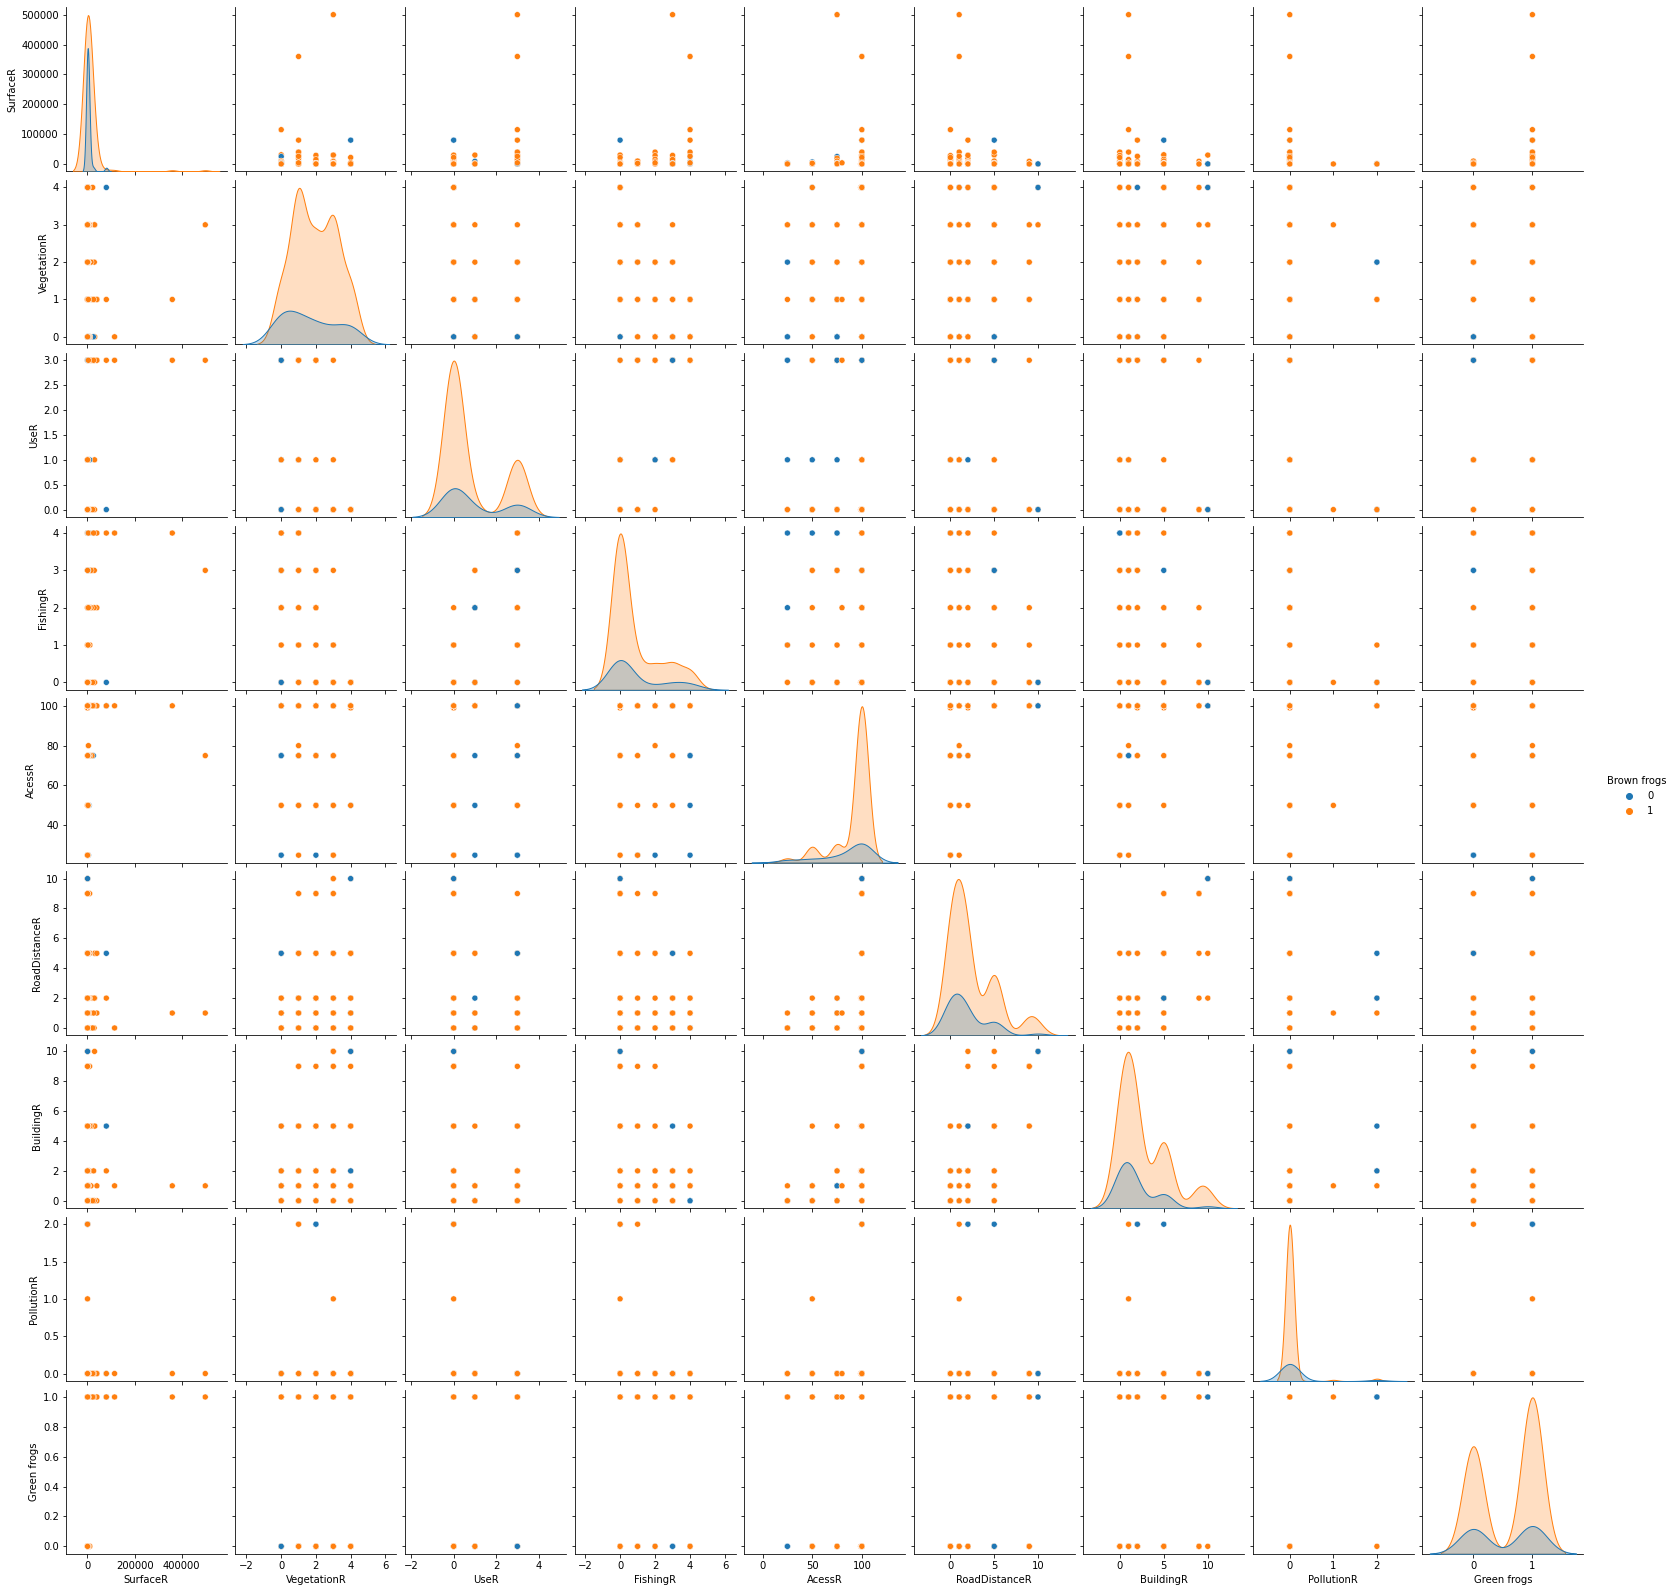

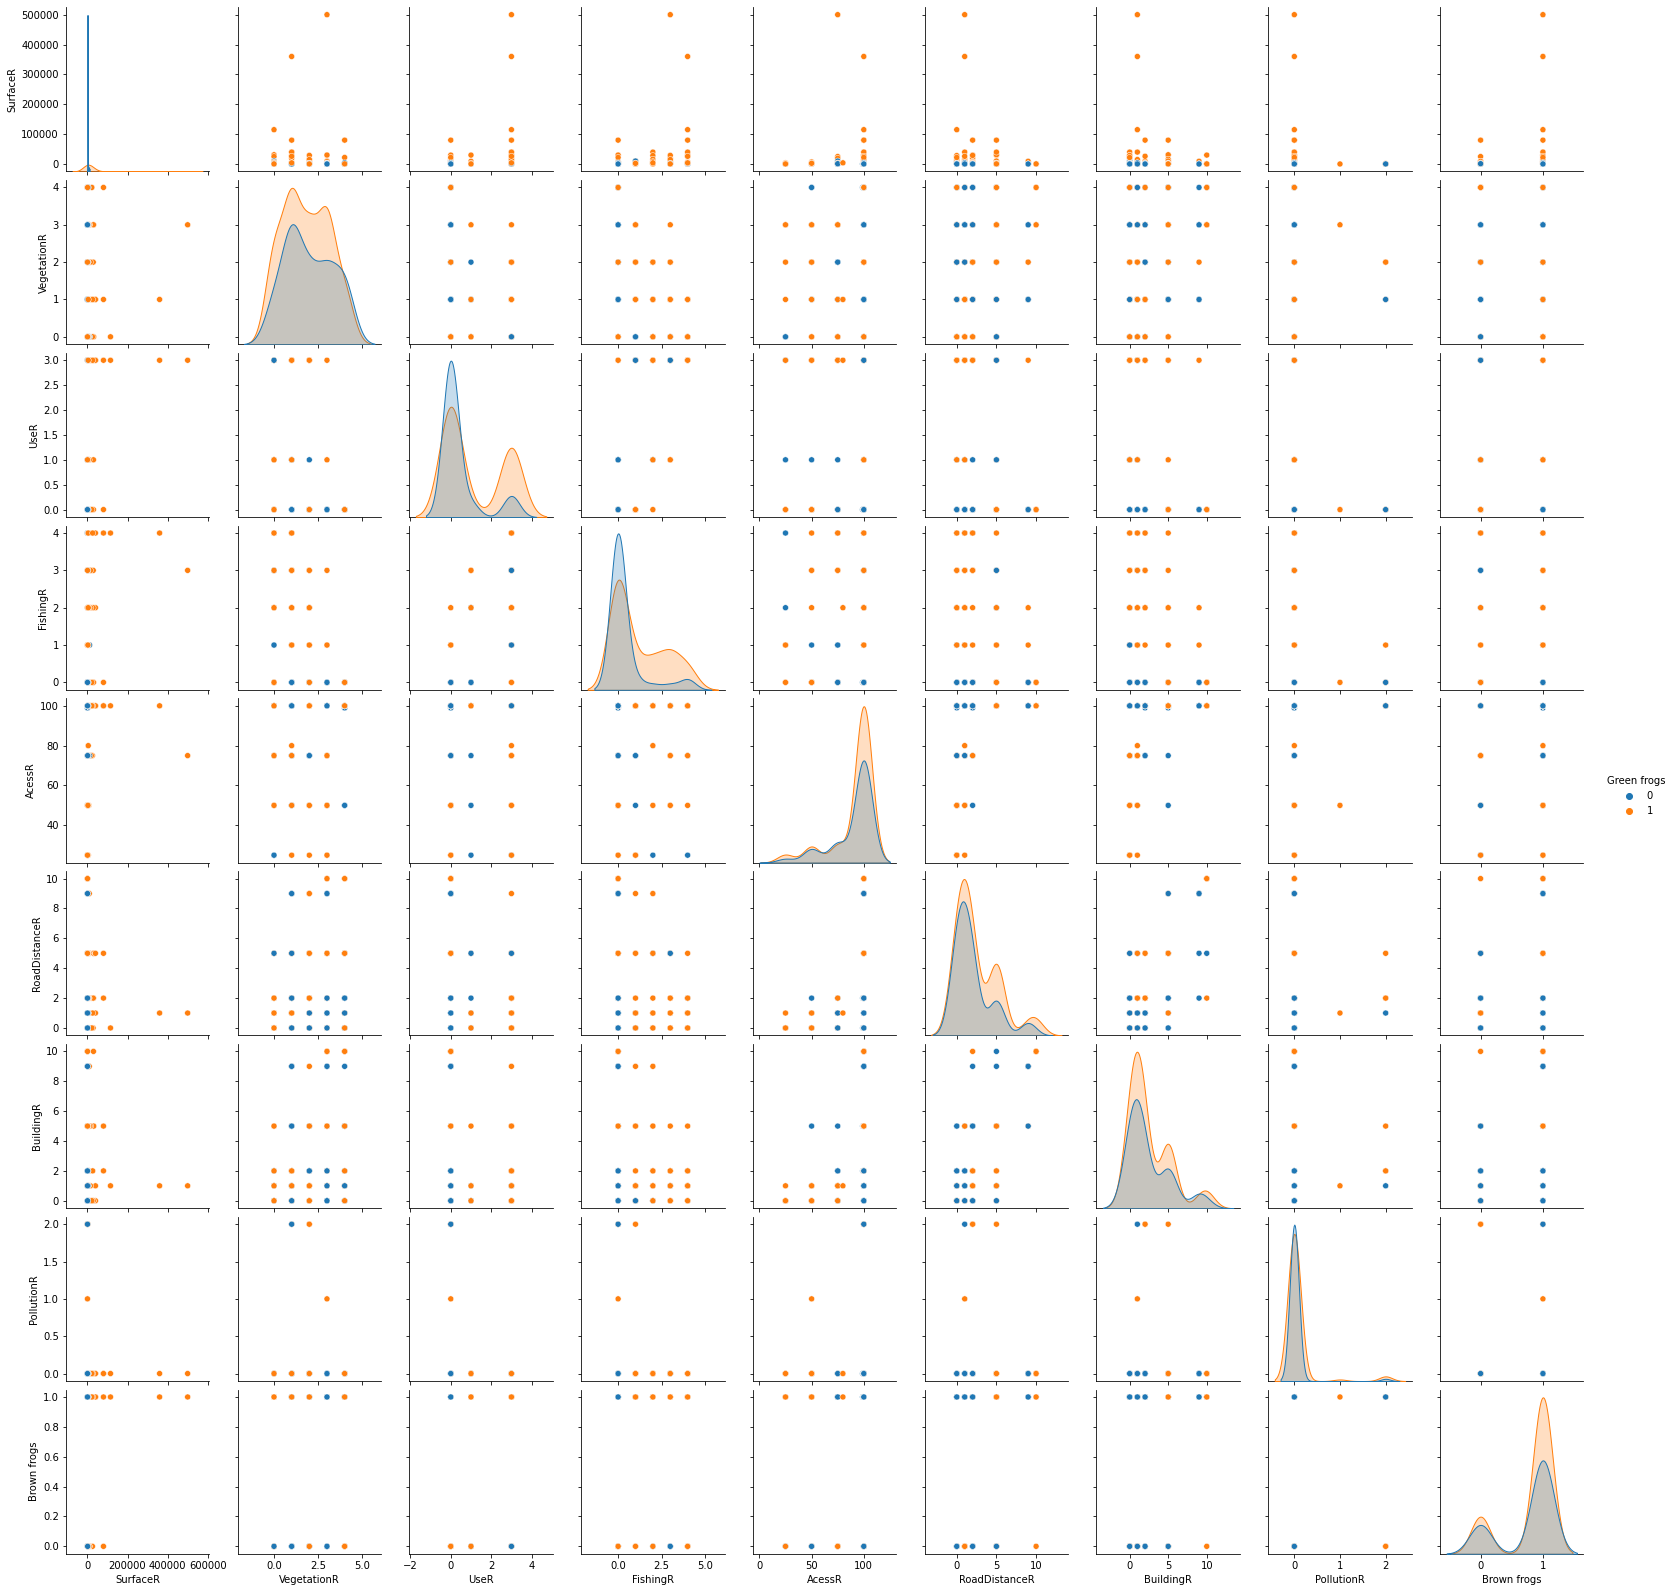

In [27]:
svm_data = restricted_data.copy()
print(svm_data)
target_features = svm_data.columns[-2:]
descriptive_features = svm_data.columns[:10]
sns.pairplot(svm_data, hue="Brown frogs")
sns.pairplot(svm_data, hue="Green frogs")

Explanation: Some of the descriptive 

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

Explanation:

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [ ]:
from sklearn.svm import SVC

descriptiveFeatures = 

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

Explanation:


## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

In [ ]:
# Your code

Explanation:

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [ ]:
# the student should choose -> results differ

   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

Explanation:

In [ ]:
# Your code

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [ ]:
# Your code

   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [ ]:
# (linear activation function):

In [ ]:
#  (non-linear activation function):

Explanation:

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [ ]:
# code for 2 more NN

Explanation:

## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [ ]:
# Your code

- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [ ]:
# Your code for the confusion matrices on the training data

- Print the cell-by-cell summation of the confusion matrices on the test data.

In [ ]:
# Your code for the confusion matrices on the test data

- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [ ]:
# Your code for precision, recall and F1-scores on the test data

- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [ ]:
# Your code for accuracy scores on training and test data

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

In [ ]:
# Your code

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

(c) Split the diagram at 3 and find the number the clusters at this point.

In [ ]:
# Your code

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

In [ ]:
# Your code